# 1. 메모리 변수 제거

In [ ]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]

# 2. 사용 패키지

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


# 3. 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Data

/content/drive/MyDrive/Data


In [ ]:
df = np.load('통합.npz')
print(list(df))

['X', 'y']


In [ ]:
X = df['X']
y = df['y']

In [ ]:
print(np.shape(X))
print(np.shape(y))
print(np.unique(y))

(27366, 64, 64, 3)
(27366,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


- 갈비구이 : 0
- 갈비찜 : 1
- 갈치조림 : 2
- 계란말이 : 3
- 고등어구이 : 4
- 김밥 : 5
- 김치찌개 : 6
- 닭갈비 : 7
- 닭볶음탕 : 8
- 떡볶이 : 9
- 라면 : 10
- 만두 : 11
- 미역국 : 12
- 배추김치 : 13
- 보쌈 : 14
- 불고기 : 15
- 비빔밥 : 16
- 삼겹살 : 17
- 삼계탕 : 18
- 양념치킨 : 19
- 육개장 : 20
- 잡채 : 21
- 제육볶음 : 22
- 족발 : 23
- 짜장면 : 24
- 짬뽕 : 25
- 파전 : 26
- 후라이드치킨 : 27

# 4. 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.1, random_state = 2021
)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24629, 64, 64, 3)
(2737, 64, 64, 3)
(24629,)
(2737,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size = 0.3, random_state = 2021
)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(17240, 64, 64, 3)
(7389, 64, 64, 3)
(17240,)
(7389,)


# 5. 이미지 제너레이터

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    zoom_range = 0.5,
    shear_range = 0.5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 90,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
val_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size = 32
)
val_generator = val_datagen.flow(
    X_val, y_val,
    batch_size = 32
)

# 6. CNN
- 컨볼루션 신경망
- 컴퓨터 비전 (Computer Vision) 에서 사용
- 텍스트, 시계열 데이터 등에서도 성능 좋음
- 오버피팅 회피
    - 규제화 함수
        - 가중치 감쇠 (Weight Decay)
        - 모델 복잡도 제한
        - L1, L2, 엘라스틱 넷 (Elastic Net)
        - 기능에 맞춰 가중치 합 구해 손실 함수에 더함
        - 가중치 절대값 합 (릿지) + 가중치 제곱값 합 (라쏘) = (엘라스틱 넷)
    - 드롭 아웃
        - 학습 진행 중 신경망 일부 유닛 제외
        - 테스트 중 작동 하지 않고 모든 유닛 활성화
        - 출력을 드롭 아웃 비율만큼 제외
        - 드롭 아웃 비율 0.2 ~ 0.5
    - 배치 정규화
        - 드롭 아웃과 비교
        - 내부 공선성 (Internal Covariance Shift) 해결 방법
        - 출력값 범위 제한 -> 불확실성 감소 목적
        - 그래디언트 손실, 폭주 없이 높은 학습률 사용 가능
        - 자체적 규제화 효과 포함
        - Dense or Conv2D -> BatchNormalization() -> Activation()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
model = Sequential()
# (64, 64, 3)
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 input_shape = (64, 64, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l1_l2(l1 = 0.001, l2 = 0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l1_l2(l1 = 0.001, l2 = 0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l1_l2(l1 = 0.001, l2 = 0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l1_l2(l1 = 0.001, l2 = 0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l1_l2(l1 = 0.001, l2 = 0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, kernel_regularizer = l1_l2(l1 = 0.001, l2 = 0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(28, activation = 'softmax'))
# 0 ~ 27 : 28개

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64, 64, 32)        0

In [ ]:
model.compile(
    optimizer = Adam(1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.1,
    patience = 50,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = True
)

In [ ]:
PATH = '/content/drive/MyDrive/Data/CHECKPOINT/통합_CNN_1.h5'
checkpoint_dir = os.path.dirname(PATH)
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath = PATH,
    monitor = 'val_acc',
    save_best_only = True,
    save_weights_only = False,
    verbose = 1,
    mode = 'auto',
    save_freq = 'epoch',
    options = None
)

In [ ]:
rlr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_acc',
    factor = 0.5,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    min_delta = 0.005,
    cooldown = 0,
    min_lr = 0
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 500,
    batch_size = 32,
    validation_data = (X_val, y_val),
    callbacks = [es, cp, rlr],
    verbose = 1
)

Epoch 1/500
539/539 [==============================] - ETA: 0s - loss: 32.2312 - acc: 0.1940
Epoch 00001: val_acc improved from -inf to 0.13642, saving model to /content/drive/MyDrive/Data/CHECKPOINT/통합_CNN_1.h5
539/539 [==============================] - 85s 155ms/step - loss: 32.2312 - acc: 0.1940 - val_loss: 25.0360 - val_acc: 0.1364 - lr: 1.0000e-04
Epoch 2/500
539/539 [==============================] - ETA: 0s - loss: 18.6307 - acc: 0.3324
Epoch 00002: val_acc improved from 0.13642 to 0.24333, saving model to /content/drive/MyDrive/Data/CHECKPOINT/통합_CNN_1.h5
539/539 [==============================] - 85s 157ms/step - loss: 18.6307 - acc: 0.3324 - val_loss: 14.7007 - val_acc: 0.2433 - lr: 1.0000e-04
Epoch 3/500
539/539 [==============================] - ETA: 0s - loss: 12.0512 - acc: 0.3829
Epoch 00003: val_acc improved from 0.24333 to 0.28637, saving model to /content/drive/MyDrive/Data/CHECKPOINT/통합_CNN_1.h5
539/539 [==============================] - 86s 160ms/step - loss: 12.051

# 7. 그래프
- '훈련, 검증 손실 그래프', '훈련, 검증 정확도 그래프'
- 규제화 함수 사용 : 기본 설정에 비해서 훈련, 검증 그래프의 벌어짐이 약간 개선됨, 성능은 비슷함
- 드롭 아웃 사용 : 훈련, 검증 그래프의 벌어짐이 크게 개선됨, 성능은 약간 낮아짐
- 배치 정규화 사용 : 훈련, 검증 그래프의 벌어짐이 더 심해짐, 성능은 크게 향상됨

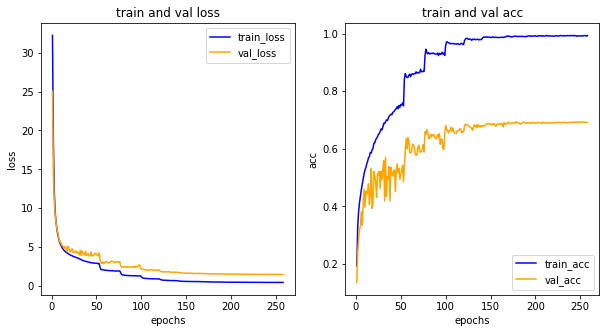

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))
# 훈련, 검증 손실
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()
acc = his_dict['acc']
val_acc = his_dict['val_acc']
# 훈련, 검증 정확도
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()

# 8. 모델 예측

In [ ]:
from keras.models import load_model
PATH = '/content/drive/MyDrive/Data/CHECKPOINT'
model_c = load_model(PATH + '/' + '통합_CNN.h5')

In [ ]:
score = model.evaluate(
    X_test, y_test,
    verbose = 1
)
print(f'테스트 데이터 손실율 : {score[0]}')
print(f'테스트 데이터 정확도 : {score[1]}')

86/86 [==============================] - 3s 30ms/step - loss: 1.5333 - acc: 0.6913
테스트 데이터 손실율 : 1.5332698822021484
테스트 데이터 정확도 : 0.6912677884101868


In [ ]:
score = model_c.evaluate(
    X_test, y_test,
    verbose = 1
)
print(f'테스트 데이터 손실율 : {score[0]}')
print(f'테스트 데이터 정확도 : {score[1]}')

86/86 [==============================] - 3s 29ms/step - loss: 3.0452 - acc: 0.6423
테스트 데이터 손실율 : 3.0452070236206055
테스트 데이터 정확도 : 0.6423090696334839


# 9. 모델 저장

In [ ]:
cd /content/drive/MyDrive/Data

/content/drive/MyDrive/Data


In [ ]:
from keras.models import load_model
model_c.save('통합_CNN.h5')